<a href="https://colab.research.google.com/github/Nhattu0102/Final-Project-Proposal/blob/main/Project_Proposal_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from io import StringIO
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_course_engagement_data.csv to online_course_engagement_data (1).csv


In [ ]:
df = pd.read_csv('online_course_engagement_data.csv')
df.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


In [ ]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [ ]:
# Chuyển đổi các cột float64 thành int64
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype('int64')

# Kiểm tra lại thông tin DataFrame để xác nhận thay đổi
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   UserID                 9000 non-null   int64 
 1   CourseCategory         9000 non-null   object
 2   TimeSpentOnCourse      9000 non-null   int64 
 3   NumberOfVideosWatched  9000 non-null   int64 
 4   NumberOfQuizzesTaken   9000 non-null   int64 
 5   QuizScores             9000 non-null   int64 
 6   CompletionRate         9000 non-null   int64 
 7   DeviceType             9000 non-null   int64 
 8   CourseCompletion       9000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 632.9+ KB


,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,49.659556,10.024667,5.090556,74.202778,49.848111,0.500667,0.396444
std,2596.849433,28.494457,6.029878,3.157762,14.371065,28.953825,0.500027,0.489186
min,1.000000,1.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2251.750000,25.000000,5.000000,2.000000,62.000000,25.000000,0.000000,0.000000
50%,4483.500000,49.000000,10.000000,5.000000,74.000000,50.000000,1.000000,0.000000
75%,6751.250000,75.000000,15.000000,8.000000,87.000000,75.000000,1.000000,1.000000
max,9000.000000,99.000000,20.000000,10.000000,99.000000,99.000000,1.000000,1.000000


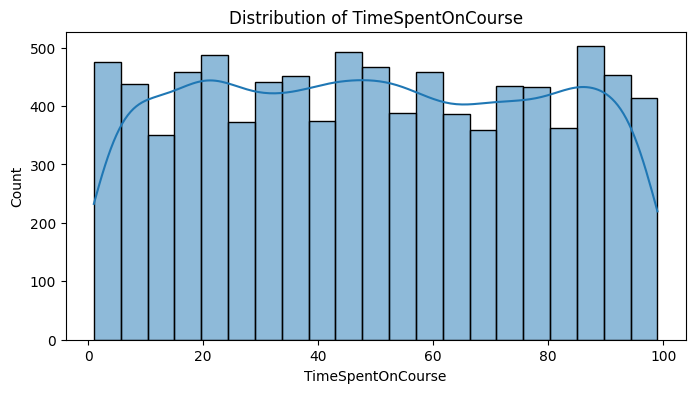

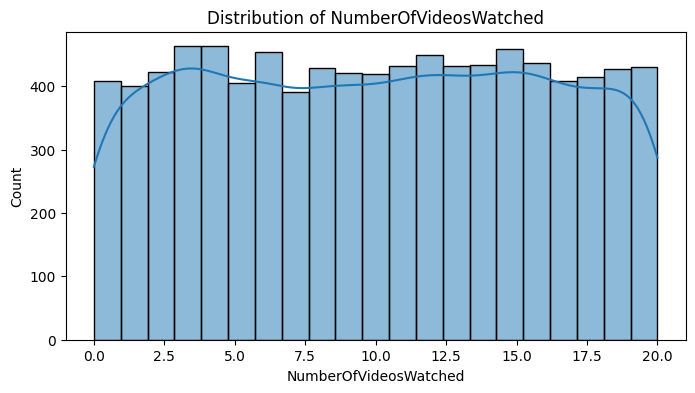

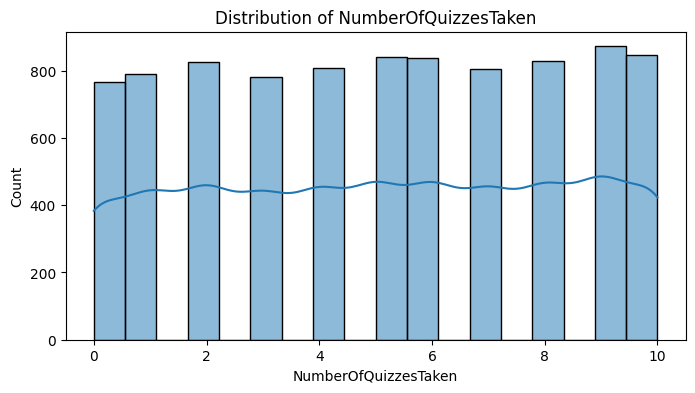

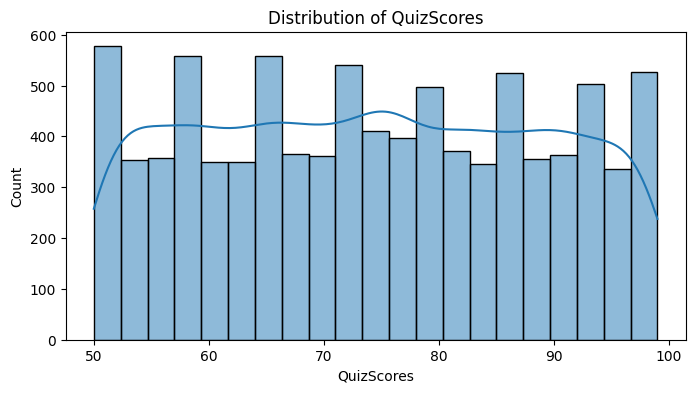

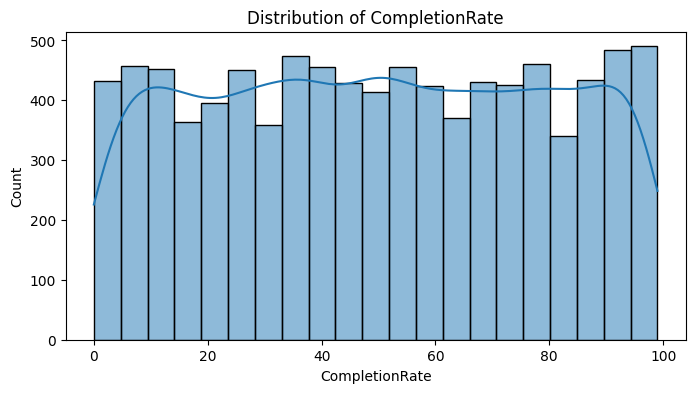

In [ ]:
# Biểu đồ phân phối cho các biến số
numerical_cols = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

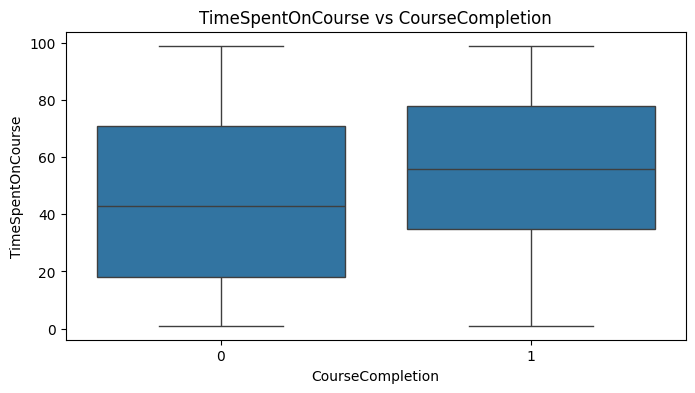

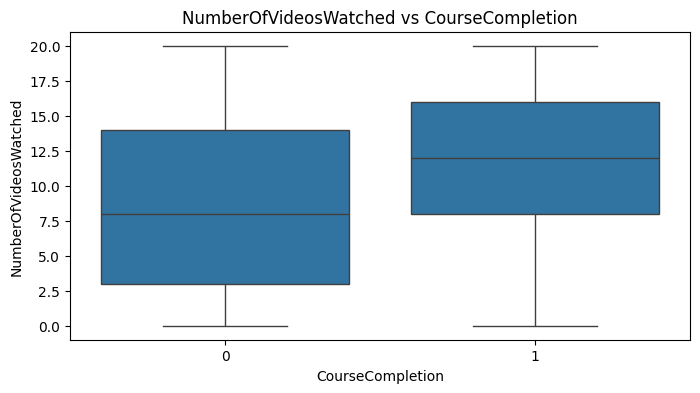

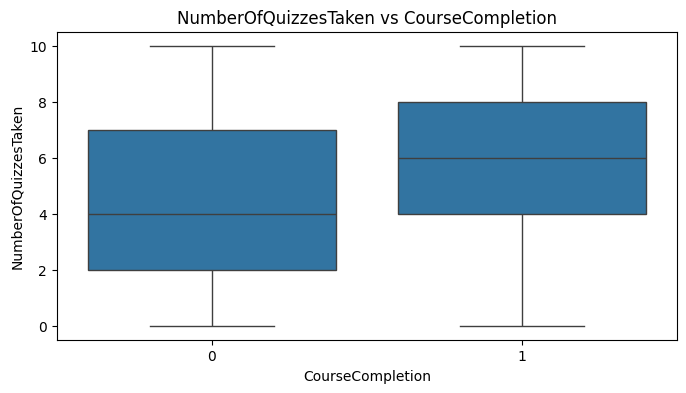

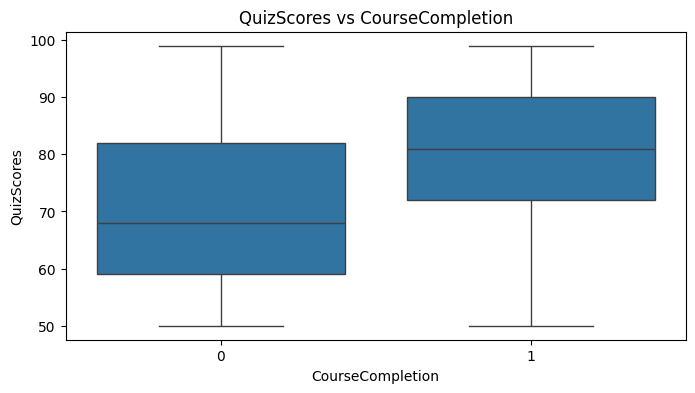

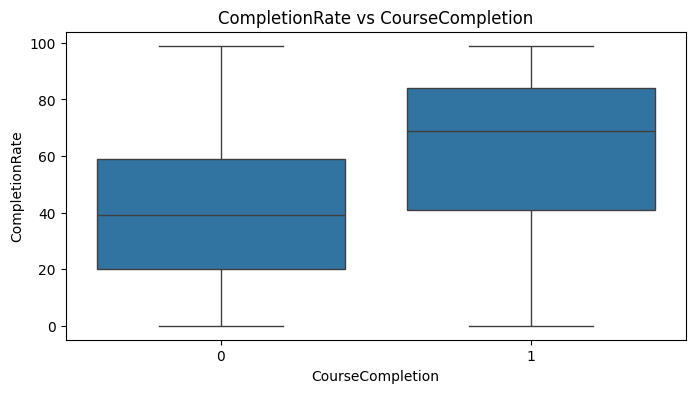

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='CourseCompletion', y=col, data=df)
    plt.title(f'{col} vs CourseCompletion')
    plt.show()

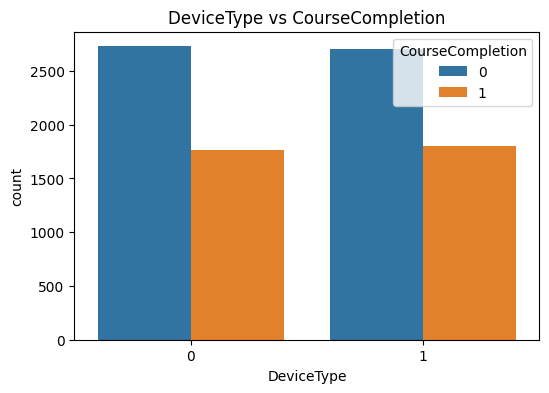

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DeviceType', hue='CourseCompletion', data=df)
plt.title('DeviceType vs CourseCompletion')
plt.show()

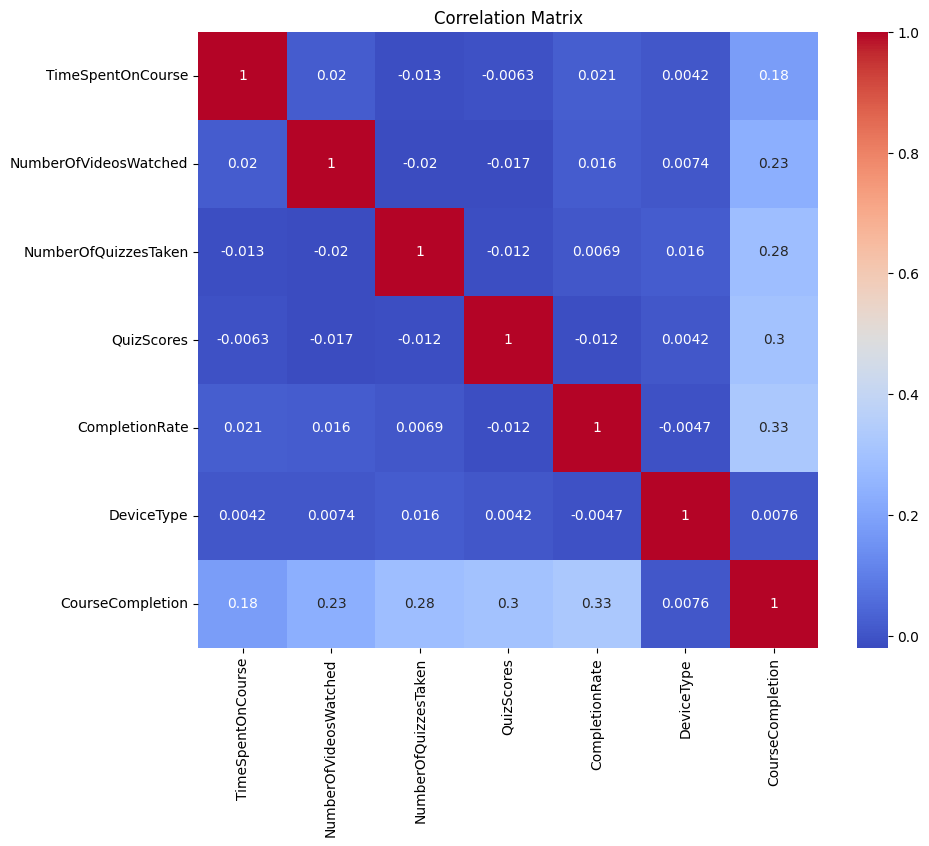

In [ ]:
# Ma trận tương quan
corr_matrix = df[['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType', 'CourseCompletion']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from statsmodels.formula.api import ols

# Kiểm tra xem DeviceType có phải là biến phân loại không
print(df['DeviceType'].unique())

# Nếu DeviceType không phải là biến phân loại, hãy chuyển đổi nó
df['DeviceType'] = df['DeviceType'].astype('category')

# Thực hiện kiểm định ANOVA
model = ols('CourseCompletion ~ C(DeviceType)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Kiểm tra giá trị p
p_value = anova_table['PR(>F)']['C(DeviceType)']
alpha = 0.05

if p_value < alpha:
    print("Có sự khác biệt có ý nghĩa thống kê về tỷ lệ hoàn thành khóa học giữa các loại thiết bị.")
else:
    print("Không có đủ bằng chứng để kết luận có sự khác biệt.")

[1 0]
                    sum_sq      df         F   PR(>F)
C(DeviceType)     0.122786     1.0  0.513072  0.47383
Residual       2153.363436  8998.0       NaN      NaN
Không có đủ bằng chứng để kết luận có sự khác biệt.


In [ ]:
X = df[['CompletionRate', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores']]
y = df['CourseCompletion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.445567
         Iterations 7


In [ ]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 7200
Model:                          Logit   Df Residuals:                     7194
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                  0.3370
Time:                        08:25:56   Log-Likelihood:                -3208.1
converged:                       True   LL-Null:                       -4838.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -11.6460      0.287    -40.508      0.000     -12.210     -11.083
CompletionRate            0.0360      0.001     29.486      0.000       0.034       0.038
TimeSpen

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Tính toán các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc_roc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)

# In kết quả đánh giá
print(f'Accuracy: {accuracy}')
print(f'F1-score: {f1}')
print(f'AUC-ROC: {auc_roc}')
print(f'Confusion Matrix:\n{confusion}')

Accuracy: 0.8161111111111111
F1-score: 0.761699064074874
AUC-ROC: 0.8801165840862722
Confusion Matrix:
[[940 155]
 [176 529]]


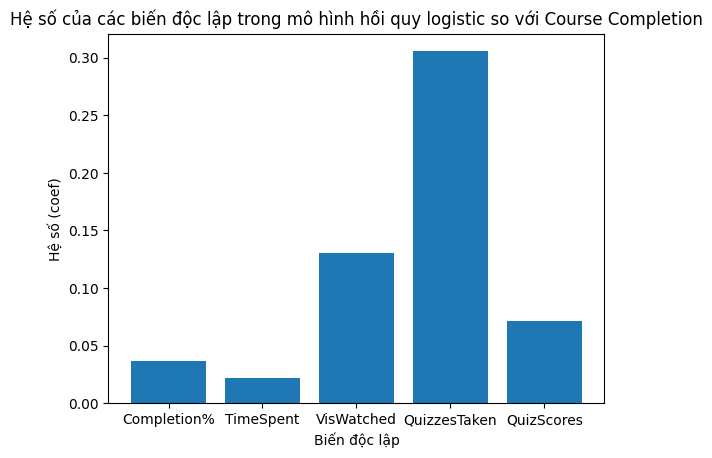

In [ ]:
variables = ['Completion%', 'TimeSpent', 'VisWatched', 'QuizzesTaken', 'QuizScores']
coef = [0.0363, 0.0217, 0.1306, 0.3056, 0.0715]

plt.bar(variables, coef)
plt.xlabel('Biến độc lập')
plt.ylabel('Hệ số (coef)')
plt.title('Hệ số của các biến độc lập trong mô hình hồi quy logistic so với Course Completion')
plt.show()

In [ ]:
data = df

df = pd.DataFrame(data)
df.to_csv('data.csv', index=False, encoding='utf-8')

print("File CSV đã được tạo thành công.")

File CSV đã được tạo thành công.
